In [2]:
import xpress as xp
import pandas as pd
import math
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read the Excel file, turn into dataframe
pool = pd.read_excel('SampleData.xlsx', engine='openpyxl')

# Remove unnecessary coloumns
df = pool.drop('dage', axis=1)

print(df)

     donor_id  source  recipient  score  altruistic
0           0     0.0        NaN    NaN         NaN
1           1     1.0        0.0   22.0         NaN
2           1     1.0        7.0   86.0         NaN
3           1     1.0        9.0   76.0         NaN
4           1     1.0       12.0   17.0         NaN
..        ...     ...        ...    ...         ...
257        63     NaN       29.0   45.0         1.0
258        63     NaN       38.0   53.0         1.0
259        63     NaN       39.0   72.0         1.0
260        63     NaN       43.0   76.0         1.0
261        63     NaN       55.0   37.0         1.0

[262 rows x 5 columns]


In [4]:
edges = df.dropna(subset=['score']).set_index(['donor_id', 'recipient'])['score'].to_dict()

In [5]:
def compatibility_network(df):
    G = nx.DiGraph() 

    if isinstance(df, list):
        pool = pd.DataFrame(df)  
    else:
        pool = df.copy()
    
    # Convert to numeric and handle NaN
    pool['source'] = pd.to_numeric(pool['source'], errors='coerce')
    pool['recipient'] = pd.to_numeric(pool['recipient'], errors='coerce')
    pool['score'] = pd.to_numeric(pool['score'], errors='coerce')

    # Create a list where each donor_id maps to a list of recipients
    matches = []
    for _, row in pool.iterrows():
        source = row['source']
        recipient = row['recipient']
        score = row['score']

        # Ensure valid donor & recipient
        if not np.isnan(source) and not np.isnan(recipient):  
            matches.append((source, recipient, score))
        
    
    # Add nodes and edges to the graph
    for source, recipient, score in matches:
        G.add_node(source)
        G.add_node(recipient)
        G.add_edge(source, recipient, score=score)
    
    # Draw the graph
    #plt.figure(figsize=(12, 10))
    #pos = nx.spring_layout(G, k=0.5, seed=42) 
    #nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='black', 
            #node_size=200, font_size=5, font_weight='bold', arrows=True)

    # Add weights as labels
    #edge_labels = {(source, recipient): f"{score:.1f}" for source, recipient, score in matches}
    #nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red')
    
    #plt.title("Compatibility Network")
    #plt.show()

    return G

In [6]:
G = compatibility_network(df)

In [7]:
edges.items()

dict_items([((1, 0.0), 22.0), ((1, 7.0), 86.0), ((1, 9.0), 76.0), ((1, 12.0), 17.0), ((1, 18.0), 85.0), ((1, 20.0), 30.0), ((1, 22.0), 89.0), ((1, 29.0), 24.0), ((1, 34.0), 69.0), ((1, 46.0), 43.0), ((1, 51.0), 46.0), ((2, 0.0), 79.0), ((2, 4.0), 17.0), ((2, 7.0), 54.0), ((2, 9.0), 15.0), ((2, 20.0), 44.0), ((2, 25.0), 69.0), ((2, 26.0), 57.0), ((2, 36.0), 89.0), ((2, 38.0), 11.0), ((2, 51.0), 15.0), ((3, 7.0), 33.0), ((3, 26.0), 66.0), ((4, 20.0), 60.0), ((5, 0.0), 86.0), ((5, 3.0), 62.0), ((5, 7.0), 63.0), ((5, 8.0), 17.0), ((5, 18.0), 11.0), ((5, 20.0), 44.0), ((5, 22.0), 34.0), ((5, 29.0), 74.0), ((5, 38.0), 48.0), ((5, 45.0), 4.0), ((5, 53.0), 33.0), ((5, 60.0), 14.0), ((7, 20.0), 57.0), ((7, 22.0), 64.0), ((8, 7.0), 52.0), ((8, 26.0), 23.0), ((8, 31.0), 38.0), ((8, 47.0), 52.0), ((8, 57.0), 67.0), ((9, 20.0), 83.0), ((9, 22.0), 20.0), ((10, 7.0), 34.0), ((10, 9.0), 46.0), ((11, 7.0), 17.0), ((11, 55.0), 36.0), ((12, 7.0), 10.0), ((12, 26.0), 24.0), ((12, 54.0), 25.0), ((13, 0.0),

In [8]:
# Imports
import xpress as xp
import networkx as nx

# NetworkX tutorial available here: 
# https://networkx.org/documentation/stable/tutorial.html

In [9]:
# Parameters for the optimization:
k = 3 # max cycle length

In [10]:
# Input data from the dataset
# Ensure compatibility with Example input data below

# # Depending on how we define pairs, the results change!!!
# # This gives 2486 
# pairs = list(set([recipient for source, recipient in edges.keys()]))
# print(pairs) # missing 13 and 24 because these pairs are not recipients....
# # but surely they can still give a kidney? 
# # If we have pairs that do not have a compatibility to receive, should they be included in the pairs list?

# This one gives 1942
# This version lists all donor id's that are not altruistic donors
pairs = list(set(df[df['altruistic'] != True]['donor_id']))
pairs = [float(i) for i in pairs]
print(pairs)

 
altruistic_donors = list(set(df[df['altruistic'] == True]['donor_id']))
altruistic_donors = [float(i) for i in altruistic_donors] # is it needed?

nodes = pairs + altruistic_donors
print(nodes)
edges = edges

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 18.0, 20.0, 22.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 34.0, 35.0, 36.0, 38.0, 39.0, 40.0, 41.0, 43.0, 44.0, 45.0, 46.0, 47.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 18.0, 20.0, 22.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 34.0, 35.0, 36.0, 38.0, 39.0, 40.0, 41.0, 43.0, 44.0, 45.0, 46.0, 47.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0]


In [11]:
# # Example input data 1

# pairs = ["P1", "P2", "P3", "P4"] 
# altruistic_donors = ["NDD1"]
# nodes = pairs + altruistic_donors
# edges = {("NDD1", "P1"): 2,
#          ("P1", "P2"): 10, 
#          ("P2", "P3"): 10,
#          ("P3", "P4"): 10,
#          ("P4", "P1"): 10
# }

# # Example input data 2

# pairs = ["P1", "P2", "P3", "P4", "P5"] 
# altruistic_donors = ["NDD1"]
# nodes = pairs + altruistic_donors
# edges = {("NDD1", "P1"): 0.1,
#          ("P1", "P2"): 10, 
#          ("P2", "P3"): 9,
#          ("P3", "P4"): 8,
#          ("P4", "P5"): 7,
#          ("P5", "P1"): 6
# }

# # Example input data 3

# pairs = ["P1", "P2", "P3", "P4", "P5"] 
# altruistic_donors = ["NDD1"]
# nodes = pairs + altruistic_donors
# edges = {("NDD1", "P1"): 0.1,
#          ("P1", "P2"): 10, 
#          ("P2", "P3"): 9,
#          ("P3", "P4"): 8,
#          ("P4", "P5"): 7
# }

In [12]:
# Create the loop!

# Create Xpress Model
# Initialize the model
prob = xp.problem()

# Define decision variables for each edge
y = {e: xp.var(vartype=xp.binary, name=f"y_{e[0]}_{e[1]}") for e in edges}
prob.addVariable(list(y.values()))

# Objective: Maximize total benefit
prob.setObjective(xp.Sum(y[e] * w for e, w in edges.items()), sense=xp.maximize)

# Constraints
for v in pairs:
    prob.addConstraint(xp.Sum(y[e] for e in edges if e[0] == v) <= xp.Sum(y[e] for e in edges if e[1] == v))
    prob.addConstraint(xp.Sum(y[e] for e in edges if e[1] == v) <= 1)

for a in altruistic_donors:
    prob.addConstraint(xp.Sum(y[e] for e in edges if e[0] == a) <= 1)


# Add a test callback - COULDN'T WORK OUT HOW TO MAKE WORK QUICKLY ENOUGH
# prob.addcbpreintsol(myCallback,None,1)

finished = False # A flag to mark the end of the optimization.
infeasible = False # A (currently unused) flag to mark no feasible solution.
# TODO: Add a catch for no feasible solution. This shouldn't happen but it is
# probably better to be robust about this.

while finished == False and infeasible == False:
  
    # Solve the model
    prob.solve()
    opt_sol = prob.getSolution()

    # Construct the graph from the optimal solution:
    DG = nx.DiGraph()
    selected_edges = [list(edges.keys())[i] for i, e in enumerate(list(edges.keys())) if opt_sol[i]==1]
    DG.add_edges_from(selected_edges)

    # Check if there is a cycle length that is too long:
    cycles = list(nx.simple_cycles(DG))

    # If ok, report done.
    # TODO: Rewrite this so that it is with the max_cycle bit...
    if cycles==[] or max(map(len,cycles))<=k:
        print("")
        print("##########################################################")
        print(f"OPTIMIZATION COMPLETE: no cycles of length more than {k}.")
        print("##########################################################")
        print("")
        finished = True
        break
    
    # If not done, report that reoptimization is required:
    else:
        print("")
        print("#################################################################")
        print(f"REOPTIMIZATION REQUIRED: proposed solution contains long cycles.")
        print("#################################################################")
        print("")

    # Take the long cycle we found and make a note of its edges:
    max_cycle = max(cycles,key=len)
    cycle_edges = [(max_cycle[i],max_cycle[i+1]) for i in range(len(max_cycle)-1)]
    cycle_edges += [(max_cycle[-1],max_cycle[0])]

    # Add the constraint to remove this as an option: 
    prob.addConstraint(xp.Sum(y[e] for e in cycle_edges) <= len(max_cycle)-1)


# Print the output
print("")
print("")
print("")

# print("Optimal Matches:")
# for (u, v), var in y.items():
#     if prob.getSolution(var) > 0.5:
#         print(f"{u} donates to {v} with benefit {edges[(u,v)]}")
solution_edges = [e for e in edges if prob.getSolution(y[e]) > 0.05]
print(solution_edges)

print(f"Total Benefit: {prob.getObjVal()}")
print("")
print("")
print("")

FICO Xpress v9.4.2, Community, solve started 11:09:24, Feb 27, 2025
Heap usage: 472KB (peak 472KB, 85KB system)
Maximizing MILP noname using up to 8 threads and up to 7518MB memory, with these control settings:
OUTPUTLOG = 1
NLPPOSTSOLVE = 1
XSLP_DELETIONCONTROL = 0
XSLP_OBJSENSE = -1
Original problem has:
       103 rows          261 cols          783 elements       261 entities
Presolved problem has:
        88 rows          235 cols          690 elements       235 entities
Presolve finished in 0 seconds
Heap usage: 556KB (peak 652KB, 85KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
  RHS and bounds [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
  Objective      [min,max] : [ 1.00e+00,  8.90e+01] / [ 1.00e+00,  1.21e+02]
Autoscaling applied standard scaling

Will try to keep branch and bound tree memory usage below 477MB
 *** Solution found:   194.000000

C:\Users\s1975950\AppData\Local\Temp\ipykernel_2704\304639392.py:5: LicenseWarning: Using the Community license in this session. If you have a full Xpress license, pass the full path to your license file to xpress.init(). If you want to use the FICO Community license and no longer want to see this message, use the following code before using the xpress module:
  xpress.init('c:/Users/s1975950/Anaconda3/envs/Xpress/Lib/site-packages/xpress/license/community-xpauth.xpr')

  prob = xp.problem()



#################################################################
REOPTIMIZATION REQUIRED: proposed solution contains long cycles.
#################################################################

FICO Xpress v9.4.2, Community, solve started 11:09:24, Feb 27, 2025
Heap usage: 2777KB (peak 6235KB, 90KB system)
Maximizing MILP noname using up to 8 threads and up to 7518MB memory, with these control settings:
OUTPUTLOG = 1
NLPPOSTSOLVE = 1
XSLP_DELETIONCONTROL = 0
XSLP_OBJSENSE = -1
Original problem has:
       104 rows          261 cols          789 elements       261 entities
Presolved problem has:
        89 rows          235 cols          696 elements       235 entities
Presolve finished in 0 seconds
Heap usage: 2879KB (peak 6235KB, 90KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
  RHS and bounds [min,max] : [ 1.00e+00,  5.00e+00] / [ 1.00e+00,  5.00e+00]
  Objecti

In [13]:
def solution_network(edges):
    G = nx.DiGraph() 

    # Add edges
    for e in edges:
        G.add_edge(e[0], e[1])

    # Draw the graph
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, k=0.208, seed=42) 
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='black', 
            node_size=300, font_size=8, font_weight='bold', arrows=True)

    
    plt.title("Solution Network")
    plt.show()

    return G

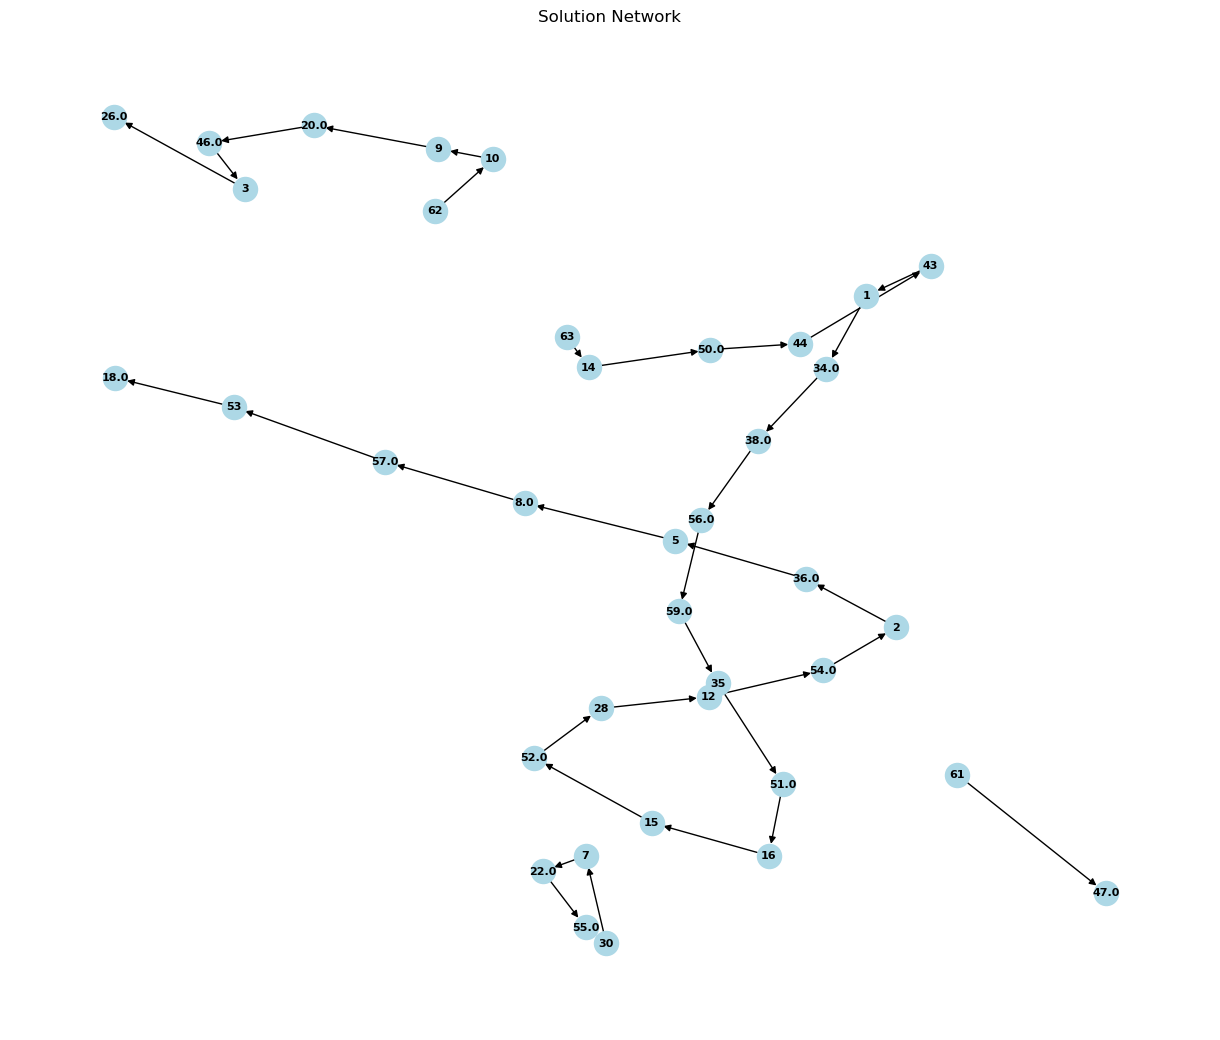

In [14]:
solution_network(solution_edges)